# Imports:

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

# Read dataset:

In [2]:
df = pd.read_csv('/content/online_shoppers_intention.csv', sep=",")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Preprocessing:

In [4]:
df['labels'] = df['Revenue'].apply(lambda x: 0 if x == False else 1)

In [5]:
df['labels'].value_counts()

0    10422
1     1908
Name: labels, dtype: int64

In [6]:
category_col = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
df_category = df[category_col]

In [7]:
numerical_col = list(set(df.drop(['Revenue','labels'],axis=1).columns) - set(category_col))

In [8]:
df_numerical = df[numerical_col]

In [9]:
catg_encoder = OneHotEncoder()
df_category_onehot = catg_encoder.fit_transform(df_category)

In [10]:
scaling = StandardScaler()
df_numerical_scaled = scaling.fit_transform(df_numerical)

In [11]:
df_category_onehot

<12330x71 sparse matrix of type '<class 'numpy.float64'>'
	with 98640 stored elements in Compressed Sparse Row format>

In [12]:
len(df_numerical_scaled)

12330

In [13]:
len(df_numerical_scaled[0])

9

In [14]:
features = np.concatenate((df_numerical_scaled, df_category_onehot.toarray()), axis=1)
labels = df['labels']

In [15]:
len(features[0])

80

In [16]:
features[0]

array([-0.69699296, -0.62434752, -0.4571914 ,  3.22931559, -0.69100318,
       -0.3964779 , -0.24493051,  3.66718879, -0.31717784,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [17]:
len(features)

12330

# Split dataset:

In [ ]:
random_state = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=random_state)  # 0.33 0.2
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

# Helper functions:

In [ ]:
def print_metrics(prediction, real):

    print("Accuracy:", accuracy_score(prediction, real))
    print("Precision:", precision_score(prediction, real))
    print("Recall:", recall_score(prediction, real))
    print("F1-Score:", f1_score(prediction, real))
    print("ROC-AUC:", roc_auc_score(prediction, real))

In [ ]:
def plot_learning_curve_f1(model, X, y, title):    
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=5, 
                                                             scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)

    fig, ax = plt.subplots()

    ax.plot(np.linspace(0.1, 1.0, 10)*100, train_scores_mean, 'o-', color="r", label='Training Scores')
    ax.plot(np.linspace(0.1, 1.0, 10)*100, valid_scores_mean, 'o-', color="g", label='Validation Scores')

    ax.set_xlabel('Training Size (in percent)')
    ax.set_ylabel('Mean F1 Score')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)

# Decision Tree:

## Default tree:

In [ ]:
default_tree = DecisionTreeClassifier(random_state=random_state)

start_time = time.time()
default_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_default_tree = default_tree.predict(X_test)

print_metrics(pred_default_tree, y_test)

print('Training Accuracy is:', default_tree.score(X_train, y_train))

Training time is: 0.08680391311645508
Accuracy: 0.8616367657901204
Precision: 0.5497630331753555
Recall: 0.5559105431309904
F1-Score: 0.5528196981731534
ROC-AUC: 0.7365669474295672
Training Accuracy is: 1.0


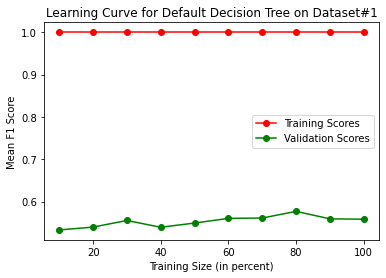

In [ ]:
plot_learning_curve_f1(default_tree, X_train, y_train, 'Learning Curve for Default Decision Tree on Dataset#1')

In [ ]:
default_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## pre pruning: try 1

In [ ]:
params = {'max_depth': range(1, 10, 5),
         'min_samples_split': range(2, 200, 20),
         'min_samples_leaf': range(1, 100, 20)}

clf = DecisionTreeClassifier(criterion='gini', random_state=random_state)

gcv = GridSearchCV(estimator=clf, param_grid=params, cv=5,
                   scoring='accuracy', return_train_score=True)
gcv.fit(X_train,y_train)

pre_pruning_tree = gcv.best_estimator_

start_time = time.time()
pre_pruning_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_pre_pruning_tree = pre_pruning_tree.predict(X_test)

print_metrics(pred_pre_pruning_tree, y_test)

print("Training Accuracy is:", pre_pruning_tree.score(X_train, y_train))

Training time is: 0.043198585510253906
Accuracy: 0.9002211845662325
Precision: 0.5639810426540285
Recall: 0.7330595482546202
F1-Score: 0.6375000000000001
ROC-AUC: 0.8280038109782314
Training Accuracy is: 0.9106645684541823


In [ ]:
pre_pruning_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=61, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

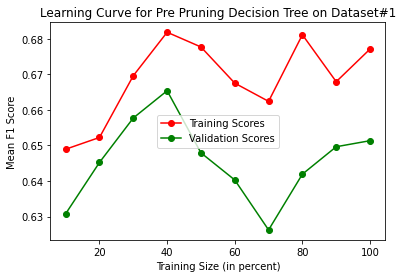

In [ ]:
plot_learning_curve_f1(pre_pruning_tree, X_train, y_train, 'Learning Curve for Pre Pruning Decision Tree on Dataset#1')

## pre pruning: try 2

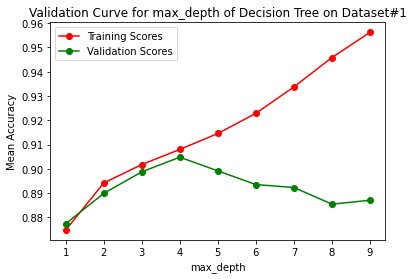

In [ ]:
clfs = []
for i in range(1, 10):
    tree = DecisionTreeClassifier(max_depth=i, random_state=random_state)
    tree.fit(X_training, y_training)
    clfs.append(tree)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 10), training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 10), validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('max_depth')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for max_depth of Decision Tree on Dataset#1')
ax.legend()
plt.show(fig)

In [ ]:
# max_depth=4
max_depth_tree = DecisionTreeClassifier(max_depth=4, random_state=random_state)

start_time = time.time()
max_depth_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_max_depth_tree = max_depth_tree.predict(X_test)

print_metrics(pred_max_depth_tree, y_test)

print("Training Accuracy is:", max_depth_tree.score(X_train, y_train))

Training time is: 0.03385138511657715
Accuracy: 0.898500860162202
Precision: 0.4960505529225908
Recall: 0.7696078431372549
F1-Score: 0.6032660902977905
ROC-AUC: 0.8412365902383898
Training Accuracy is: 0.906911996126377


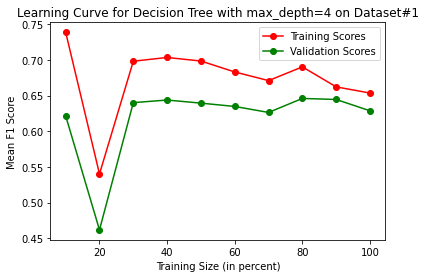

In [ ]:
plot_learning_curve_f1(max_depth_tree, X_train, y_train, 'Learning Curve for Decision Tree with max_depth=4 on Dataset#1')

In [ ]:
max_depth_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## post pruning:

In [ ]:
clf = DecisionTreeClassifier(random_state=random_state)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 7.85193861e-05 7.96524220e-05 7.98853238e-05
 7.99092990e-05 8.01199012e-05 8.01477372e-05 8.02257715e-05
 9.64101736e-05 1.03657543e-04 1.03757760e-04 1.03757760e-04
 1.03757760e-04 1.05303669e-04 1.05919380e-04 1.07600640e-04
 1.07600640e-04 1.08945648e-04 1.08945648e-04 1.10046109e-04
 1.10963160e-04 1.11739126e-04 1.11739126e-04 1.12404240e-04
 1.12404240e-04 1.12980672e-04 1.12980672e-04 1.12980672e-04
 1.12980672e-04 1.13448501e-04 1.13485050e-04 1.13485050e-04
 1.13485050e-04 1.13730423e-04 1.13930090e-04 1.14172838e-04
 1.15286400e-04 1.15548415e-04 1.15787645e-04 1.16006940e-04
 1.16523142e-04 1.16567360e-04 1.16717894e-04 1.16727480e-04
 1.17015696e-04 1.17015696e-04 1.17081844e-04 1.17779079e-04
 1.17779079e-04 1.17948958e-04 1.18069175e-04 1.18168560e-04
 1.18360704e-04 1.18472189e-04 1.18580297e-04 1.18630151e-04
 1.18722822e-04 1.18722822e-04 1.18809040e-04 1.19283556e-04
 1.19675144e-04 1.20778510e-04 1.21050720e-04 1.21050720e-04
 1.21050720e-04 1.210507

In [ ]:
len(ccp_alphas)

291

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=random_state)
    clf.fit(X_train, y_train)
    clfs.append(clf)

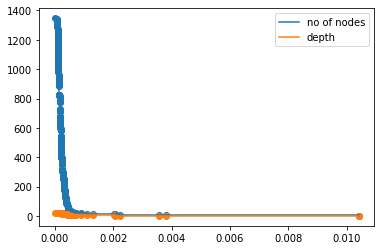

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)

plt.plot(ccp_alphas, node_counts, label='no of nodes', drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label='depth', drawstyle="steps-post")

plt.legend()
plt.show()

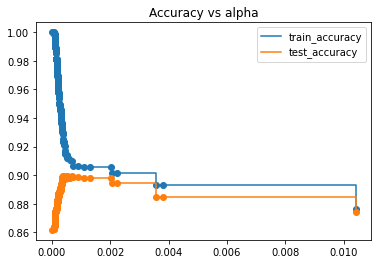

In [ ]:
train_acc = []
test_acc = []

for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)

plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")

plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
# ccp_alpha=0.02
ccp_alpha_tree = DecisionTreeClassifier(ccp_alpha=0.02, random_state=random_state)

start_time = time.time()
ccp_alpha_tree.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_ccp_alpha_tree = ccp_alpha_tree.predict(X_test)

print_metrics(pred_ccp_alpha_tree, y_test)

print("Training Accuracy is:", ccp_alpha_tree.score(X_train, y_train))

Training time is: 0.09024930000305176
Accuracy: 0.8744163185057754
Precision: 0.7946287519747235
Recall: 0.5690045248868778
F1-Score: 0.6631509558338826
ROC-AUC: 0.7640940991781328
Training Accuracy is: 0.8765282653431788


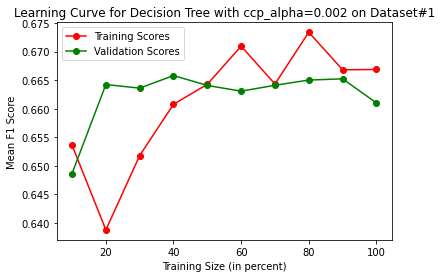

In [ ]:
plot_learning_curve_f1(ccp_alpha_tree, X_train, y_train, 'Learning Curve for Decision Tree with ccp_alpha=0.002 on Dataset#1')

In [ ]:
ccp_alpha_tree

DecisionTreeClassifier(ccp_alpha=0.02, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# KNN

## Default KNN:

In [ ]:
knn_clf = KNeighborsClassifier()

start_time = time.time()
knn_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_knn_clf = knn_clf.predict(X_test)

print_metrics(pred_knn_clf, y_test)

print("Training Accuracy is:", knn_clf.score(X_train, y_train))

Training time is: 0.09735655784606934
Accuracy: 0.8756451216515114
Precision: 0.36492890995260663
Recall: 0.6895522388059702
F1-Score: 0.47727272727272724
ROC-AUC: 0.7909464461303551
Training Accuracy is: 0.9030383730783198


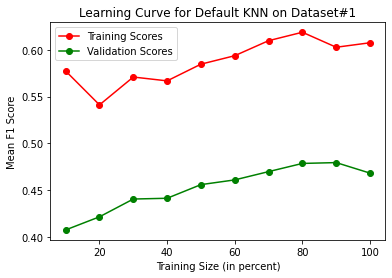

In [ ]:
plot_learning_curve_f1(knn_clf, X_train, y_train, 'Learning Curve for Default KNN on Dataset#1')

In [ ]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Tuning K:

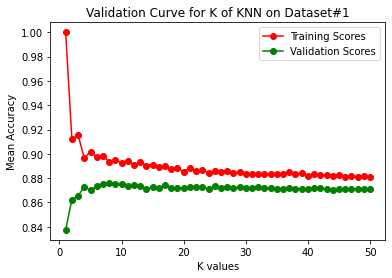

In [ ]:
clfs = []
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_training, y_training)
    clfs.append(knn)
    
training_score = [i.score(X_training, y_training) for i in clfs]
testing_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 51) , training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 51) , testing_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('K values')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for K of KNN on Dataset#1')
ax.legend()
plt.show(fig)

In [ ]:
# k=30
k_knn = KNeighborsClassifier(n_neighbors=30)

start_time = time.time()
k_knn.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_k_knn = k_knn.predict(X_test)

print_metrics(pred_k_knn, y_test)

print("Training Accuracy is:", k_knn.score(X_train, y_train))

Training time is: 0.09184885025024414
Accuracy: 0.8783484885721308
Precision: 0.2796208530805687
Recall: 0.8194444444444444
F1-Score: 0.41696113074204955
ROC-AUC: 0.8505475531332007
Training Accuracy is: 0.8828229027962716


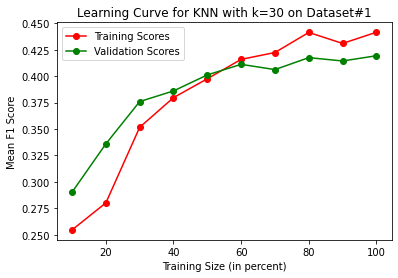

In [ ]:
plot_learning_curve_f1(k_knn, X_train, y_train, 'Learning Curve for KNN with k=30 on Dataset#1')

In [ ]:
k_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
# k=10
k_knn = KNeighborsClassifier(n_neighbors=10)

start_time = time.time()
k_knn.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_k_knn = k_knn.predict(X_test)

print_metrics(pred_k_knn, y_test)

print("Training Accuracy is:", k_knn.score(X_train, y_train))

Training time is: 0.0048754215240478516
Accuracy: 0.7052631578947368
Precision: 0.10714285714285714
Recall: 0.5
F1-Score: 0.17647058823529413
ROC-AUC: 0.6095505617977528
Training Accuracy is: 0.7696335078534031


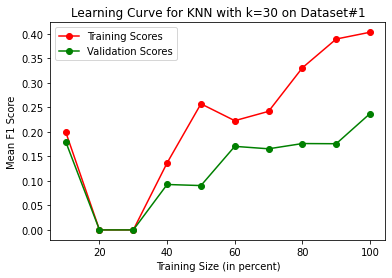

In [ ]:
plot_learning_curve_f1(k_knn, X_train, y_train, 'Learning Curve for KNN with k=30 on Dataset#1')

In [ ]:
k_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

## Tuning more:

In [ ]:
params = {'n_neighbors' : [5, 30, 50],
          'metric' : ['minkowski', 'euclidean', 'manhattan']}

clf = KNeighborsClassifier()

gcv = GridSearchCV(clf, params, cv=5, scoring='accuracy', return_train_score=True)

gcv.fit(X_train,y_train)
best_knn = gcv.best_estimator_

start_time = time.time()
best_knn.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_best_knn = best_knn.predict(X_test)

print_metrics(pred_best_knn, y_test)

print("Training Accuracy is:", best_knn.score(X_train, y_train))

Training time is: 0.08666682243347168
Accuracy: 0.8783484885721308
Precision: 0.27330173775671407
Recall: 0.8317307692307693
F1-Score: 0.41141498216409034
ROC-AUC: 0.8562953250453251
Training Accuracy is: 0.8785861275874591


In [ ]:
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

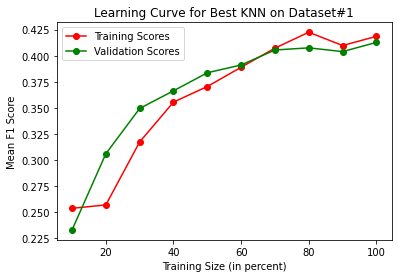

In [ ]:
plot_learning_curve_f1(best_knn, X_train, y_train, 'Learning Curve for Best KNN on Dataset#1')

# Adaboost

## Default:

In [ ]:
model_ABC = AdaBoostClassifier(random_state=random_state)

start_time = time.time()
model_ABC.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_model_ABC = model_ABC.predict(X_test)

print_metrics(pred_model_ABC, y_test)

print("Training Accuracy is:", model_ABC.score(X_train, y_train))

Training time is: 0.739332914352417
Accuracy: 0.8911280412877857
Precision: 0.5434439178515008
Recall: 0.6907630522088354
F1-Score: 0.6083112290008842
ROC-AUC: 0.8049166703217238
Training Accuracy is: 0.8961384820239681


In [ ]:
model_ABC

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

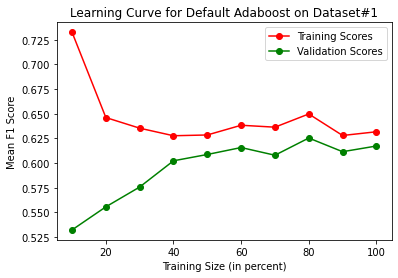

In [ ]:
plot_learning_curve_f1(model_ABC, X_train, y_train, 'Learning Curve for Default Adaboost on Dataset#1')

## Default boosted tree:

In [ ]:
tree = DecisionTreeClassifier(random_state=random_state)

model_ABC_dt = AdaBoostClassifier(tree, random_state=random_state)

start_time = time.time()
model_ABC_dt.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_model_ABC_dt = model_ABC_dt.predict(X_test)

print_metrics(pred_model_ABC_dt, y_test)

print("Training Accuracy is:", model_ABC_dt.score(X_train, y_train))

Training time is: 0.09129214286804199
Accuracy: 0.8626198083067093
Precision: 0.5545023696682464
Recall: 0.5589171974522293
F1-Score: 0.556701030927835
ROC-AUC: 0.7384821383948156
Training Accuracy is: 1.0


In [ ]:
model_ABC_dt

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

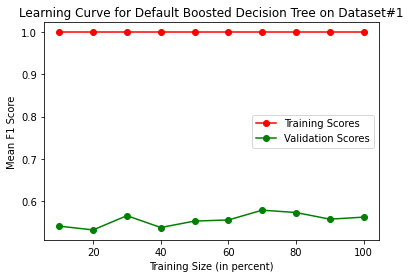

In [ ]:
plot_learning_curve_f1(model_ABC_dt, X_train, y_train, 'Learning Curve for Default Boosted Decision Tree on Dataset#1')

## Tune n_estimators:

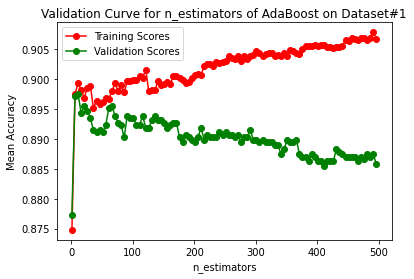

In [ ]:
clfs = []
for i in range(1, 500, 5):
    ABC = AdaBoostClassifier(n_estimators=i, random_state=random_state)
    ABC.fit(X_training, y_training)
    clfs.append(ABC)
    
training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 500, 5) , training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 500, 5) , validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for n_estimators of AdaBoost on Dataset#1')
ax.legend()
plt.show(fig)

## Tune n_estimators for Boosted Decision Tree:

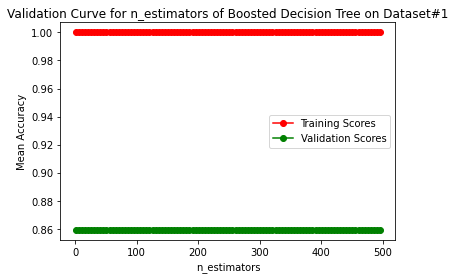

In [ ]:
tree = DecisionTreeClassifier(random_state=random_state)
clfs = []
for i in range(1, 500, 5):
    ABC = AdaBoostClassifier(tree, n_estimators=i, random_state=random_state)
    ABC.fit(X_training, y_training)
    clfs.append(ABC)
    
training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(range(1, 500, 5) , training_score, 'o-', color="r", label='Training Scores')
ax.plot(range(1, 500, 5) , validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for n_estimators of Boosted Decision Tree on Dataset#1')
ax.legend()
plt.show(fig)

### we can choose n_estimator=20:

In [ ]:
# n_estimator=20 for ABC model
model_ABC_estimator = AdaBoostClassifier(n_estimators=20, random_state=random_state)

start_time = time.time()
model_ABC_estimator.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_model_ABC_estimator = model_ABC_estimator.predict(X_test)

print_metrics(pred_model_ABC_estimator, y_test)

print("Training Accuracy is:", model_ABC_estimator.score(X_train, y_train))

Training time is: 0.26787471771240234
Accuracy: 0.8894077168837552
Precision: 0.5497630331753555
Recall: 0.6783625730994152
F1-Score: 0.6073298429319371
ROC-AUC: 0.7991081706891902
Training Accuracy is: 0.8926280111366662


In [ ]:
model_ABC_estimator

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=42)

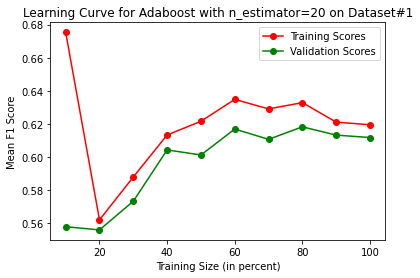

In [ ]:
plot_learning_curve_f1(model_ABC_estimator, X_train, y_train, 'Learning Curve for Adaboost with n_estimator=20 on Dataset#1')

## Post Pruning:

#### aggressive:

In [ ]:
clf = DecisionTreeClassifier(random_state=random_state)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
len(ccp_alphas)

291

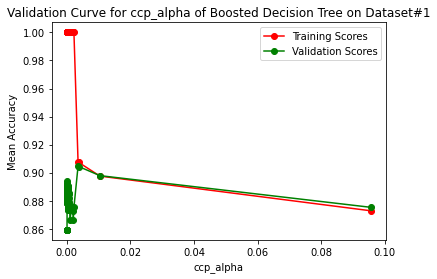

In [ ]:
clfs = []
prune_size = ccp_alphas

for i in prune_size:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    ABC_clf = AdaBoostClassifier(tree,
                          n_estimators=20, random_state=random_state)
    ABC_clf.fit(X_training, y_training)
    clfs.append(ABC_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(prune_size, training_score, 'o-', color="r", label='Training Scores')
ax.plot(prune_size, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('ccp_alpha')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for ccp_alpha of Boosted Decision Tree on Dataset#1')
ax.legend()
plt.show(fig)

In [ ]:
# ccp_alpha=0.01 , n_estimator=20
tree = DecisionTreeClassifier(ccp_alpha=0.01)
pruned_ABC_estimator = AdaBoostClassifier(tree, n_estimators=20, random_state=random_state)

start_time = time.time()
pruned_ABC_estimator.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_pruned_ABC_estimator = pruned_ABC_estimator.predict(X_test)

print_metrics(pred_pruned_ABC_estimator, y_test)

print("Training Accuracy is:", pruned_ABC_estimator.score(X_train, y_train))

Training time is: 1.9860951900482178
Accuracy: 0.8923568444335217
Precision: 0.584518167456556
Recall: 0.6788990825688074
F1-Score: 0.6281833616298811
ROC-AUC: 0.8021339907736204
Training Accuracy is: 0.8977121413872412


In [ ]:
pruned_ABC_estimator

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                      

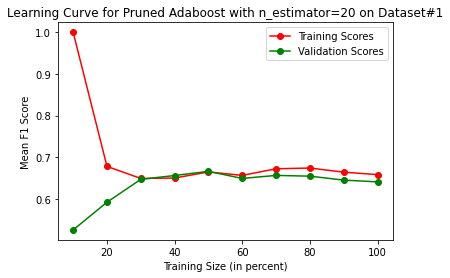

In [ ]:
plot_learning_curve_f1(pruned_ABC_estimator, X_train, y_train, 'Learning Curve for Pruned Adaboost with n_estimator=20 on Dataset#1')

In [ ]:
params =  [{'base_estimator__ccp_alpha':[0, 0.004, 0.005, 0.01, 0.02],
                'n_estimators':range(10, 50, 4)}]

tree = DecisionTreeClassifier()

ABC_clf = AdaBoostClassifier(tree, random_state=random_state)

ABC_grid_clf = GridSearchCV(ABC_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
ABC_grid_clf.fit(X_train, y_train)
ABC_grid_best = ABC_grid_clf.best_estimator_

start_time = time.time()
ABC_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_ABC = ABC_grid_best.predict(X_test)

print_metrics(pred_ABC, y_test)

print("Training Accuracy is:", ABC_grid_best.score(X_train, y_train))

Training time is: 1.1517491340637207
Accuracy: 0.8967805357581715
Precision: 0.6097946287519748
Recall: 0.6905187835420393
F1-Score: 0.6476510067114094
ROC-AUC: 0.8100742065858344
Training Accuracy is: 0.9037646773998306


In [ ]:
ABC_grid_best

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.005,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

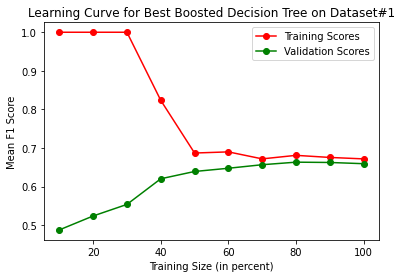

In [ ]:
plot_learning_curve_f1(ABC_grid_best, X_train, y_train, 'Learning Curve for Best Boosted Decision Tree on Dataset#1')

# SVM

## Default SVM:

In [ ]:
svm_clf = SVC()

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 3.0817949771881104
Accuracy: 0.8935856475792578
Precision: 0.4786729857819905
Recall: 0.7463054187192119
F1-Score: 0.5832531280076997
ROC-AUC: 0.8281076643145608
Training Accuracy is: 0.909696162692168


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

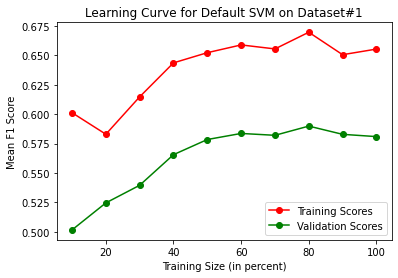

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for Default SVM on Dataset#1')

## Tune kernels:

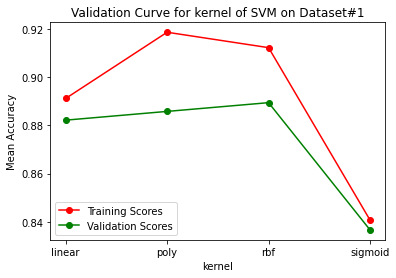

In [ ]:
clfs = []
kernel_list = ['linear','poly', 'rbf', 'sigmoid']

for i in kernel_list:
    svm_clf = SVC(kernel=i)
    svm_clf.fit(X_training, y_training)
    clfs.append(svm_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(kernel_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(kernel_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('kernel')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for kernel of SVM on Dataset#1')
ax.legend()
plt.show(fig)

## Tune C:

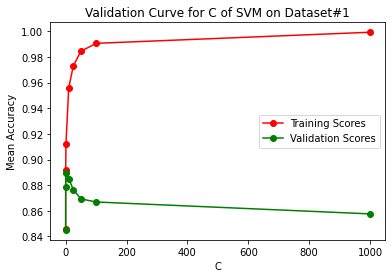

In [ ]:
clfs = []
C_list = [0.001, 0.10, 1, 10, 25, 50, 100, 1000]

for i in C_list:
    svm_clf = SVC(C=i)
    svm_clf.fit(X_training, y_training)
    clfs.append(svm_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(C_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(C_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('C')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for C of SVM on Dataset#1')
ax.legend()
plt.show(fig)

## Tune gamma:

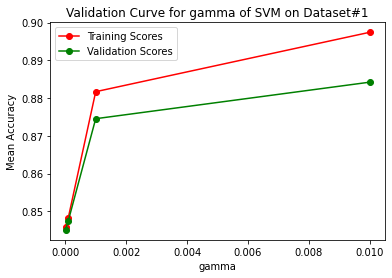

In [ ]:
clfs = []
gamma_list = [1e-2, 1e-3, 1e-4, 1e-5]

for i in gamma_list:
    svm_clf = SVC(gamma=i)
    svm_clf.fit(X_training, y_training)
    clfs.append(svm_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(gamma_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(gamma_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('gamma')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for gamma of SVM on Dataset#1')
ax.legend()
plt.show(fig)

## kernel=linear, default:

In [ ]:
svm_clf = SVC(kernel='linear')

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 4.337022304534912
Accuracy: 0.8820348980093389
Precision: 0.37598736176935227
Recall: 0.7368421052631579
F1-Score: 0.497907949790795
ROC-AUC: 0.8156981482001855
Training Accuracy is: 0.8880280837670984


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

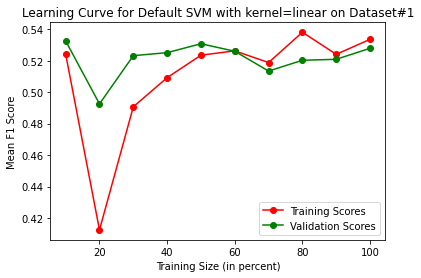

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for Default SVM with kernel=linear on Dataset#1')

## kernel=linear, grid search cv:

In [ ]:
params =  [{'C': [0.1, 1, 10, 100]}]

svm_clf = SVC(kernel='linear', random_state=random_state)

svm_grid_clf = GridSearchCV(svm_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
svm_grid_clf.fit(X_train, y_train)
svm_grid_best = svm_grid_clf.best_estimator_

start_time = time.time()
svm_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm = svm_grid_best.predict(X_test)

print_metrics(pred_svm, y_test)

print("Training Accuracy is:", svm_grid_best.score(X_train, y_train))

Training time is: 116.29632115364075
Accuracy: 0.8820348980093389
Precision: 0.37598736176935227
Recall: 0.7368421052631579
F1-Score: 0.497907949790795
ROC-AUC: 0.8156981482001855
Training Accuracy is: 0.8881491344873502


In [ ]:
svm_grid_best

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

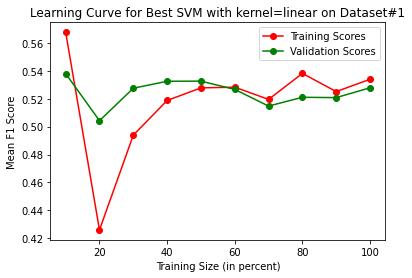

In [ ]:
plot_learning_curve_f1(svm_grid_best, X_train, y_train, 'Learning Curve for Best SVM with kernel=linear on Dataset#1')

## kernel=poly, default:

In [ ]:
svm_clf = SVC(kernel='poly')

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 3.49834942817688
Accuracy: 0.8886704349963136
Precision: 0.4154818325434439
Recall: 0.7601156069364162
F1-Score: 0.5372829417773238
ROC-AUC: 0.8303666941477675
Training Accuracy is: 0.9152644958237501


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

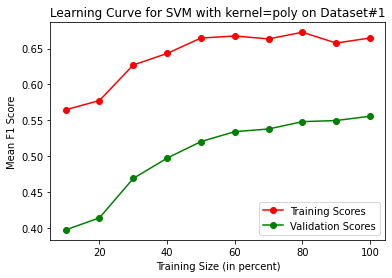

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for SVM with kernel=poly on Dataset#1')

## kernel=poly, grid search cv:

In [ ]:
params =  [{'C': [10, 50, 100, 1000],
            'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}]

svm_clf = SVC(kernel='poly', random_state=random_state)

svm_grid_clf = GridSearchCV(svm_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
svm_grid_clf.fit(X_train, y_train)
svm_grid_best = svm_grid_clf.best_estimator_

start_time = time.time()
svm_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm = svm_grid_best.predict(X_test)

print_metrics(pred_svm, y_test)

print("Training Accuracy is:", svm_grid_best.score(X_train, y_train))

Training time is: 2.6667439937591553
Accuracy: 0.884492504300811
Precision: 0.3570300157977883
Recall: 0.7820069204152249
F1-Score: 0.49023861171366595
ROC-AUC: 0.8371674813716335
Training Accuracy is: 0.905701488923859


In [ ]:
svm_grid_best

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

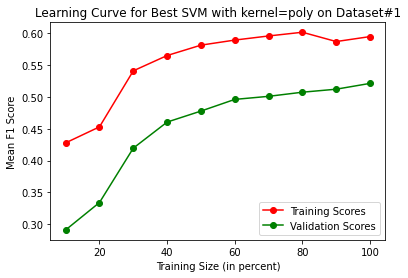

In [ ]:
plot_learning_curve_f1(svm_grid_best, X_train, y_train, 'Learning Curve for Best SVM with kernel=poly on Dataset#1')

## kernel=rbf, default:

In [ ]:
svm_clf = SVC(kernel='rbf')

start_time = time.time()
svm_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm_clf = svm_clf.predict(X_test)

print_metrics(pred_svm_clf, y_test)

print("Training Accuracy is:", svm_clf.score(X_train, y_train))

Training time is: 2.924581527709961
Accuracy: 0.8935856475792578
Precision: 0.4786729857819905
Recall: 0.7463054187192119
F1-Score: 0.5832531280076997
ROC-AUC: 0.8281076643145608
Training Accuracy is: 0.909696162692168


In [ ]:
svm_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

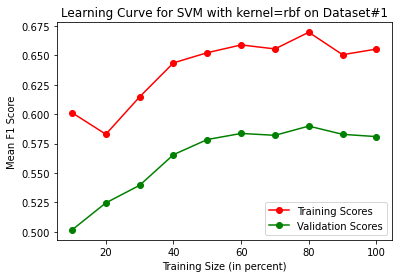

In [ ]:
plot_learning_curve_f1(svm_clf, X_train, y_train, 'Learning Curve for SVM with kernel=rbf on Dataset#1')

## kernel=rbf, grid search cv:

In [ ]:
params =  [{'C': [10, 50, 100, 1000],
                'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}]

svm_clf = SVC(kernel='rbf', random_state=random_state)

svm_grid_clf = GridSearchCV(svm_clf, params, cv=5,
                            scoring='accuracy', return_train_score=True)
svm_grid_clf.fit(X_train, y_train)
svm_grid_best = svm_grid_clf.best_estimator_

start_time = time.time()
svm_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_svm = svm_grid_best.predict(X_test)

print_metrics(pred_svm, y_test)

print("Training Accuracy is:", svm_grid_best.score(X_train, y_train))

Training time is: 5.2410430908203125
Accuracy: 0.8898992381420496
Precision: 0.4549763033175355
Recall: 0.7365728900255755
F1-Score: 0.5625
ROC-AUC: 0.8213859556163766
Training Accuracy is: 0.9030383730783198


In [ ]:
svm_grid_best

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

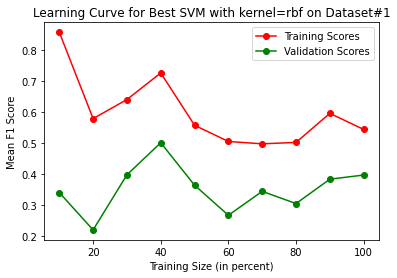

In [ ]:
plot_learning_curve_f1(svm_grid_best, X_train, y_train, 'Learning Curve for Best SVM with kernel=rbf on Dataset#1')

# Neural Networks

## Default NN:

In [ ]:
mlp_clf = MLPClassifier(random_state=random_state)

start_time = time.time()
mlp_clf.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_mlp_clf = mlp_clf.predict(X_test)

print_metrics(pred_mlp_clf, y_test)

print("Training Accuracy is:", { mlp_clf.score(X_train, y_train)} )

Training time is: 12.104767560958862
Accuracy: 0.8830179405259277
Precision: 0.5276461295418642
Recall: 0.6536203522504892
F1-Score: 0.5839160839160839
ROC-AUC: 0.7847921884917427
Training Accuracy is: {0.9755477545091393}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


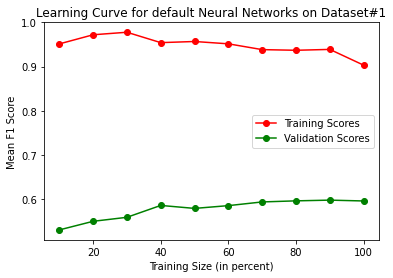

In [ ]:
plot_learning_curve_f1(mlp_clf, X_train, y_train, 'Learning Curve for default Neural Networks on Dataset#1')

## Tune Activations:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


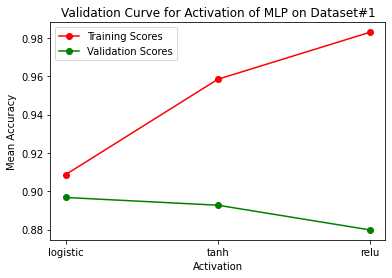

In [ ]:
clfs = []
activation_list = ['logistic', 'tanh', 'relu']

for i in activation_list:
    nn_clf = MLPClassifier(activation=i, random_state=random_state)
    nn_clf.fit(X_training, y_training)
    clfs.append(nn_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(activation_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(activation_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Activation')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for Activation of MLP on Dataset#1')
ax.legend()
plt.show(fig)

## Tune hidden layers:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


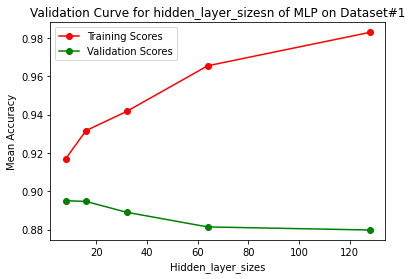

In [ ]:
clfs = []
hidden_layer_list = [(8), (16), (32), (64), (128)]

for i in hidden_layer_list:
    nn_clf = MLPClassifier(hidden_layer_sizes=i, random_state=random_state)
    nn_clf.fit(X_training, y_training)
    clfs.append(nn_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot(hidden_layer_list, training_score, 'o-', color="r", label='Training Scores')
ax.plot(hidden_layer_list, validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Hidden_layer_sizes')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for hidden_layer_sizesn of MLP on Dataset#1')
ax.legend()
plt.show(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


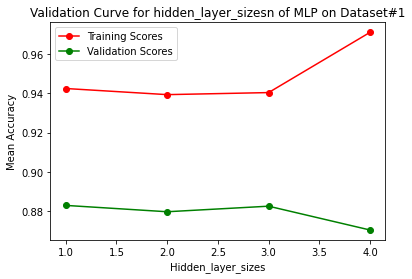

In [ ]:
clfs = []
hidden_layer_list = [(16,8), (16,4), (16, 2), (32, 16)]

for i in hidden_layer_list:
    nn_clf = MLPClassifier(hidden_layer_sizes=i, random_state=random_state)
    nn_clf.fit(X_training, y_training)
    clfs.append(nn_clf)

training_score = [i.score(X_training, y_training) for i in clfs]
validation_score = [i.score(X_validation, y_validation) for i in clfs]

fig, ax = plt.subplots()

ax.plot([1,2,3,4], training_score, 'o-', color="r", label='Training Scores')
ax.plot([1,2,3,4], validation_score, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Hidden_layer_sizes')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Validation Curve for hidden_layer_sizesn of MLP on Dataset#1')
ax.legend()
plt.show(fig)

## Tune NN: grid search cv

In [ ]:
params =  [{'activation':['logistic', 'tanh', 'relu'],
                'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]}]

mlp_clf = MLPClassifier(random_state=random_state)

mlp_grid_clf = GridSearchCV(mlp_clf, params, cv=5,
                           scoring='accuracy', return_train_score=True)

mlp_grid_clf.fit(X_train, y_train)
mlp_grid_best = mlp_grid_clf.best_estimator_

start_time = time.time()
mlp_grid_best.fit(X_train, y_train)
stop_time = time.time()
print("Training time is:", (stop_time - start_time))

pred_mlp = mlp_grid_best.predict(X_test)

print_metrics(pred_mlp, y_test)

print("Training Accuracy is:", mlp_grid_best.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 6.543929576873779
Accuracy: 0.8884246743671664
Precision: 0.5260663507109005
Recall: 0.6837782340862423
F1-Score: 0.5946428571428571
ROC-AUC: 0.8000130701419486
Training Accuracy is: 0.9370536254690716


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_grid_best

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


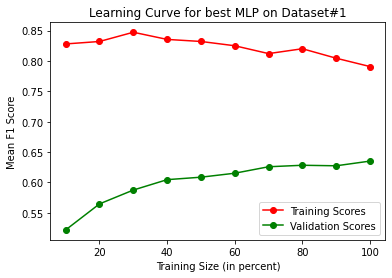

In [ ]:
plot_learning_curve_f1(mlp_grid_best, X_train, y_train, 'Learning Curve for best MLP on Dataset#1')

## Iterative curve NN:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


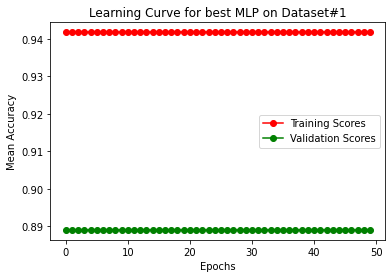

In [ ]:
clf = mlp_grid_best

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best MLP on Dataset#1')
ax.legend()
plt.show(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


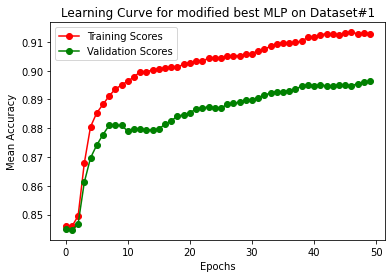

In [ ]:
clf = MLPClassifier(activation=mlp_grid_best.activation, 
                    hidden_layer_sizes=mlp_grid_best.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for modified best MLP on Dataset#1')
ax.legend()
plt.show(fig)

In [ ]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)